### Class exercise: table
![](../../images/numpy_slice_ex.png)
- on the above image find the 5 different slicings using only the array slicing notation

In [ ]:
import numpy as np

a = np.arange(10,30).reshape(4,5)

yellow = a[0,0]
red = a[0,1:-1]
light_blue = a[:,1::2]
green = a[:-1,2]
dark_blue = a[::2,-1]

print(yellow)
print(red)
print(light_blue)
print(green)
print(dark_blue)

### Class exercise: masking
- For the dataset: `data = np.arange(1,101).reshape(10,10)`
  - apply a mask that will return only the even numbers
  - using `np.where()` return only numbers that ends with 6


In [ ]:
data = np.arange(1,101).reshape(10,10)
even_numbers = data[data % 2 == 0]
print(even_numbers)

ends_with_6 = np.where(data % 10 == 6)
print(data[ends_with_6])

## Exercise numpy and csv

1. load the csv file: befkbhalderstatkode.csv into a numpy ndarray
2. How many german children of 0 years were there in Copenhagen in 2015? german 5180
3. create a function that can take any combination of the 4 parameters:AAR,BYDEL,ALDER,STATKODE and return population data
4. create a new function like previous so that it can sum values for all ages if age is not provided to the function
5. further add functionality to sum values if citizenship or area was not provided to function.
6. create a new function that can also give average values for each year if year whas not provided.
7. create a function, that given year and nationality can return which area had the most of these nationals by that year. Test it by finding out which area had the most Moroccan people in both 1992 and 2015
8. Find the Area(s) where fewest foreingers lived in Copenhagen in 1992 and 2015 respectively
9. Find out what age most French people have in 2015

In [ ]:
#1
filename = '../../data/befkbhalderstatkode.csv'
data = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

# 2
mask = (data[:,3] == 5180) & (data[:,2] == 0) & (data[:,0] == 2015)
print("2: ",np.sum(data[mask][:,4]))

In [ ]:
#3
def population_data(data,aar,bydel,alder,statskode):
  mask = (data[:,0] == aar) & (data[:,1] == bydel) & (data[:,2] == alder) & (data[:,3] == statskode)
  return data[mask]
  
print(population_data(data,2010,1,10,5100))

In [6]:
#4
def population_data_with_sum(data,aar,bydel,statskode,alder=False):
  if alder:
    mask = (data[:,0] == aar) & (data[:,1] == bydel) & (data[:,2] == alder) & (data[:,3] == statskode)
  else:
    mask = (data[:,0] == aar) & (data[:,1] == bydel) & (data[:,3] == statskode)
  return data[mask]

print("without age: ",population_data_with_sum(data,2010,1,5100))
print("with age: ",population_data_with_sum(data,2010,1,5100,10))

without age:  [[2010    1    0 5100  641]
 [2010    1    1 5100  547]
 [2010    1    2 5100  522]
 [2010    1    3 5100  448]
 [2010    1    4 5100  401]
 [2010    1    5 5100  427]
 [2010    1    6 5100  378]
 [2010    1    7 5100  357]
 [2010    1    8 5100  339]
 [2010    1    9 5100  324]
 [2010    1   10 5100  333]
 [2010    1   11 5100  309]
 [2010    1   12 5100  277]
 [2010    1   13 5100  300]
 [2010    1   14 5100  304]
 [2010    1   15 5100  297]
 [2010    1   16 5100  313]
 [2010    1   17 5100  302]
 [2010    1   18 5100  283]
 [2010    1   19 5100  320]
 [2010    1   20 5100  551]
 [2010    1   21 5100  725]
 [2010    1   22 5100  790]
 [2010    1   23 5100  830]
 [2010    1   24 5100  834]
 [2010    1   25 5100  841]
 [2010    1   26 5100  802]
 [2010    1   27 5100  871]
 [2010    1   28 5100  845]
 [2010    1   29 5100  867]
 [2010    1   30 5100  844]
 [2010    1   31 5100  875]
 [2010    1   32 5100  729]
 [2010    1   33 5100  740]
 [2010    1   34 5100  816]
 [2010

In [26]:
#5
data = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

def population_data_expanded(data,aar,bydel=False,statskode=False,alder=False):
  result = data[(data[:,0] == aar)]
  if bydel:
    result = result[(result[:,1] == bydel)]
  if statskode:
    result = result[(result[:,3] == statskode)]
  if alder:
    result = result[(result[:,2] == alder)]
  return result

print(population_data_expanded(data,2010,10))
print(population_data_expanded(data,2010,10,5110))

[[2010   10    0 5100  942]
 [2010   10    0 5106    9]
 [2010   10    0 5110    4]
 ...
 [2010   10  102 5100    1]
 [2010   10  103 5100    1]
 [2010   10  104 5100    1]]
[[2010   10    0 5110    4]
 [2010   10    1 5110    3]
 [2010   10    2 5110    2]
 [2010   10    3 5110    2]
 [2010   10    4 5110    2]
 [2010   10    6 5110    2]
 [2010   10    7 5110    1]
 [2010   10    8 5110    1]
 [2010   10    9 5110    2]
 [2010   10   10 5110    3]
 [2010   10   11 5110    2]
 [2010   10   12 5110    1]
 [2010   10   13 5110    3]
 [2010   10   14 5110    2]
 [2010   10   15 5110    1]
 [2010   10   16 5110    3]
 [2010   10   17 5110    3]
 [2010   10   19 5110    4]
 [2010   10   20 5110   10]
 [2010   10   21 5110   15]
 [2010   10   22 5110   20]
 [2010   10   23 5110   13]
 [2010   10   24 5110   19]
 [2010   10   25 5110   15]
 [2010   10   26 5110   14]
 [2010   10   27 5110   11]
 [2010   10   28 5110   15]
 [2010   10   29 5110   17]
 [2010   10   30 5110   13]
 [2010   10   

# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```

Find out how many people lived in each of the 11 areas in 2015


4. Make a bar plot to show the size of each city area from the smallest to the largest in 2015

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

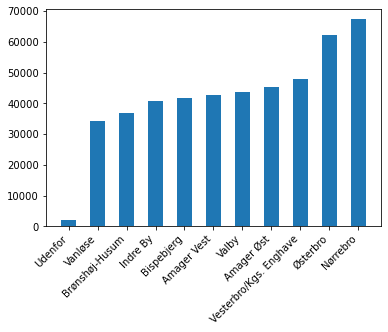

In [81]:
import numpy as np
import matplotlib.pyplot as plt
filename = '../../data/befkbhalderstatkode.csv'
raw = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

def get_pop(data,aar,statskode):
  return np.sum(data[(data[:,0] == aar) & (data[:,1] == statskode)][:,4])

pop = {}

for i in neighb:
  pop[neighb[i]] = get_pop(raw,2015,i)

sorted_pop = {k: v for k, v in sorted(pop.items(), key=lambda item: item[1])}

plt.bar(sorted_pop.keys(), sorted_pop.values(), width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

In [20]:
pop_over_65 = np.sum(raw[(raw[:,2] > 65) & (raw[:,0] == 2015)][:,4])
print(pop_over_65)

55750


6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"

In [23]:
pop_over_65_not_nordic = np.sum(raw[(raw[:,2] > 65) & (raw[:,0] == 2015) & (raw[:,3] != 5100)][:,4])
print(pop_over_65_not_nordic)

3451


7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

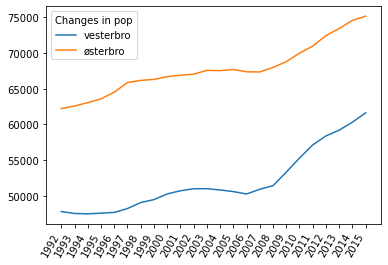

In [111]:
vesterbro = {}
østerbro = {}
for i in range(1992,2016):
  vesterbro[i] = get_pop(raw,i,4)

for i in range(1992,2016):
  østerbro[i] = get_pop(raw,i,2)

x_line = []
for i in vesterbro.keys():
  x_line.append(str(i))


plt.plot(x_line,list(vesterbro.values()), label='vesterbro')
plt.plot(x_line,list(østerbro.values()),label='østerbro')
plt.xticks(rotation=60, horizontalalignment='right',fontweight='light')
plt.legend(title='Changes in pop')

#### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD

3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: DKstat_bykoder.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 

In [103]:
import pandas as pd
filename = 'demografic_cleaned.csv'
raw_demografic = np.genfromtxt(filename, delimiter=',', dtype=np.uint)
filename = '../../data/DKstat_bykoder.csv'
raw_bykoder = pd.read_csv(filename, delimiter=',',encoding="latin1", squeeze=True)

def summed_by_city(data,city_code,year):
  return np.sum(data[(data[:,3] == year) & (data[:,1] == 1) & (data[:,0] == city_code) & (data[:,0] != 0)])

highest_pop = {}
for i in raw_bykoder['BYKODE']:
  if summed_by_city(raw_demografic,i,2020) > 0:
    highest_pop[i] = summed_by_city(raw_demografic,i,2020)

sorted_highest_pop = {k: v for k, v in sorted(highest_pop.items(), key=lambda item: item[1], reverse=True)}
print('#5','Region-Hovedstaden',list(sorted_highest_pop.values())[0],'beboere')

#5 Region-Hovedstaden 1110210 beboere


6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020